In [1]:
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
import glob
print(glob.glob('data\\tas_scenario_245\\tas_mon_mod_ssp245_192_*.nc'))

['data\\tas_scenario_245\\tas_mon_mod_ssp245_192_000.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_001.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_002.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_003.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_004.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_005.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_006.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_007.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_008.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_009.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_010.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_011.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_012.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_013.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_014.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_015.nc', 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_016.nc', 'data\\tas_scenario_245\\tas_m

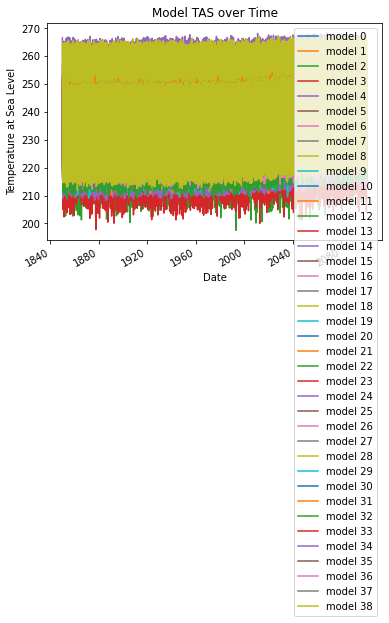

In [18]:
import xarray as xr
import pandas as pd
import glob

data_dict = {}
i = 0

for filename in glob.glob('data\\tas_scenario_245\\tas_mon_mod_ssp245_192_*.nc'):
    data = xr.open_dataset(filename)
    data_df = data.to_dataframe().reset_index()
    plot = data_df.loc[(data_df['lat'] == -89.375) & (data_df['lon'] == 0), ['time', 'tas']]
    plt.plot(plot['time'], plot['tas'], label=f'model {i}')
    i += 1

plt.title('Model TAS over Time')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Temperature at Sea Level')
plt.legend(loc='best')

In [40]:
filename = 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_008.nc'
data = xr.open_dataset(filename)
datetimeindex = data.indexes['time'].to_datetimeindex()
data['time'] = datetimeindex
data_df = data.to_dataframe().reset_index()
tas_vector = data_df.loc[(data_df['time'].dt.year > 1960) & (data_df['time'].dt.year < 1970) & (data_df['lon'] > 288) & (data_df['lon'] < 336) & (data_df['lat'] > -44) & (data_df['lat'] < -12), ['time', 'lat', 'lon', 'tas']]
tas_vector

C:\Users\jqcla\AppData\Local\Temp\ipykernel_26116\142069290.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


,time,lat,lon,tas


In [42]:
data_df['lat'].unique()

array([-89.375, -88.125, -86.875, -85.625, -84.375, -83.125, -81.875,
       -80.625, -79.375, -78.125, -76.875, -75.625, -74.375, -73.125,
       -71.875, -70.625, -69.375, -68.125, -66.875, -65.625, -64.375,
       -63.125, -61.875, -60.625, -59.375, -58.125, -56.875, -55.625,
       -54.375, -53.125, -51.875, -50.625, -49.375, -48.125, -46.875,
       -45.625, -44.375, -43.125, -41.875, -40.625, -39.375, -38.125,
       -36.875, -35.625, -34.375, -33.125, -31.875, -30.625, -29.375,
       -28.125, -26.875, -25.625, -24.375, -23.125, -21.875, -20.625,
       -19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875,
       -10.625,  -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,
        -1.875,  -0.625,   0.625,   1.875,   3.125,   4.375,   5.625,
         6.875,   8.125,   9.375,  10.625,  11.875,  13.125,  14.375,
        15.625,  16.875,  18.125,  19.375,  20.625,  21.875,  23.125,
        24.375,  25.625,  26.875,  28.125,  29.375,  30.625,  31.875,
        33.125,  34.

: 

In [36]:
data_df['tas'].isna().sum()

0

In [32]:
datetimeindex = data.indexes['time'].to_datetimeindex()
# data['time']
data['time'] = datetimeindex

AttributeError: 'DatetimeIndex' object has no attribute 'to_datetimeindex'

In [37]:
import cftime
data_df['time'][0] < cftime.DatetimeNoLeap(1960, 1, 16, 12, 0, 0, 0, has_year_zero=True)

True

In [8]:
data_df['tas'].isna().sum()


0

In [13]:
data_df[(data_df['lat'] == -89.375) & (data_df['lon'] == 0)]

0       243.845352
1       235.352936
2       223.914154
3       220.158920
4       217.610214
           ...    
3007    218.761612
3008    218.677780
3009    225.861328
3010    241.278183
3011    249.678589
Name: tas, Length: 3012, dtype: float32

In [5]:
filename = 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_002.nc'
data = xr.open_dataset(filename)

data_df = data.to_dataframe()
data_df

height         tas
lat     lon     time                                   
-89.375 0.000   1850-01-16 12:00:00     2.0  241.663177
                1850-02-15 00:00:00     2.0  237.155045
                1850-03-16 12:00:00     2.0  221.393326
                1850-04-16 00:00:00     2.0  219.522736
                1850-05-16 12:00:00     2.0  219.846024
...                                     ...         ...
 89.375 358.125 2100-08-16 12:00:00     2.0  271.770599
                2100-09-16 00:00:00     2.0  271.609741
                2100-10-16 12:00:00     2.0  268.622742
                2100-11-16 00:00:00     2.0  264.184937
                2100-12-16 12:00:00     2.0  258.322937

[83275776 rows x 2 columns]

In [ ]:
filtered_df = data_df.loc[(data_df['time'].year.between(1950, 2100, inclusive=True)) & (data_df['lat'].between(-9, -44, inclusive=True)) & (data_df['lon'].between(129, -44, inclusive=True))]